# Backtrack Testbed Notebook

Short notebook to test Bryans functions.

In [1]:
# Standard library
import sys

import numpy as np
import xarray as xr
import matplotlib.pyplot as plt

In [2]:
sys.path.insert(1, '../sealsml')

# lets try to find Ch4 max, first lets make an array of random ch4 data

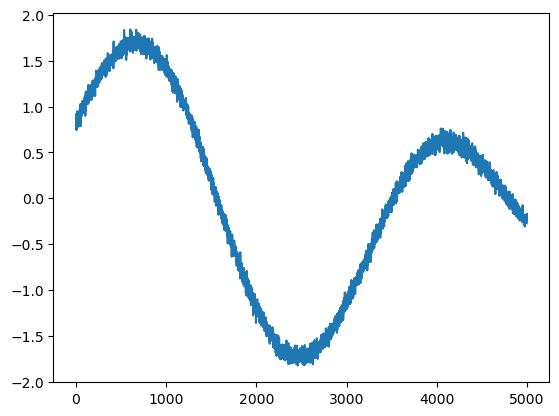

In [3]:
# Define number of data points
N = 5000

# Generate random frequencies and amplitudes for sin and cos
freq_sin = np.random.uniform(0.1, 0.5)
amp_sin = np.random.uniform(0.5, 1.5)
freq_cos = np.random.uniform(0.2, 0.8)
amp_cos = np.random.uniform(0.5, 1.5)

# Generate time series data as a 1D array
t = np.linspace(0, 20, N)
data = amp_sin * np.sin(freq_sin * t) + amp_cos * np.cos(freq_cos * t) + np.random.randn(N) * 0.05

plt.plot(data)


In [4]:
from backtrack import findmaxCH4

In [5]:
max_c_noloop, time_max_c_noloop, ijk_max_noloop = findmaxCH4(data, t)

# Backtrack Function Testing

In [6]:
from backtrack import backtrack

#### These variables are all made up. Just looking to see what it requires and see if it runs. 

In [7]:
sensor_x = 1
sensor_y = 2

pathmax = 3.2
dt = 1

ijk_start = 2

u_sonic = np.random.uniform(-10, 10, 50)
v_sonic = np.random.uniform(-10, 10, 50)

In [8]:
np.size(ijk_start)

1

In [9]:
backtrack(ijk_start, u_sonic, v_sonic, dt, sensor_x, sensor_y, 5)

(-6.137538198787734, -8.440418918686838)

### Pathmax Function

In [10]:
from backtrack import pathmax

In [11]:
factor_x = 0.5
x_width = 11
factor_y = 0.25
y_width = 30

In [12]:
paths = pathmax( x_width, y_width, factor_x, factor_y)
paths

5.5

### Data ingester for B Travis

In [13]:
data = '../test_data/training_data_SBL2m_Ug2p5_src1-8kg_b.5.nc'

In [14]:
ds = xr.load_dataset(data)

In [15]:
x = ds.encoder_input.isel(mask=0).values

In [16]:
x.shape

(600, 10, 100, 8)

In [17]:
from backtrack import create_backtrack_mlp_training_data

In [18]:
foo = create_backtrack_mlp_training_data(x)

Shape of input x (600, 10, 100, 8)
shape of export array: (1800, 14)


## Export

In [19]:
from backtrack import mlp_target_output

In [20]:
tar_ = ds.target.values

In [21]:
y = ds.decoder_input.isel(mask=0).values
y_ = y.squeeze()

In [22]:
yo = mlp_target_output(y, tar_)

number of samples [600]


## Argmin of Distance

We need a workflow to find the minimum distance, mark that as 1, and then pad it to 20 leak locations

This needs to be functionized

Padded to 20

### Let's try on 'real' data

In [26]:
mlp_output = np.random.uniform(-3, 3, size=(600, 3))
mlp_output

array([[-2.77672103, -1.16067796, -0.55579102],
       [-1.28656005, -1.47456311,  2.53243166],
       [ 1.53615408,  1.63573293,  2.38884223],
       ...,
       [-1.18904273,  0.07377446,  2.88613431],
       [-2.68761148,  1.55378465,  0.97606152],
       [ 2.21874621,  1.34912089,  1.97511056]])

In [27]:
mlp_output[11]

array([0.35266594, 1.82366216, 0.93321204])

In [28]:
from backtrack import argmin_mlp_eval

In [29]:
yo = argmin_mlp_eval(y, mlp_output)

Number of samples: 600
Max number of leaks: 20
Export shape (600, 1, 20)


In [30]:
yo

array([[[0., 0., 0., ..., 0., 0., 0.]],

       [[0., 1., 0., ..., 0., 0., 0.]],

       [[0., 0., 1., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.]]])